In [1]:
import requests 
from bs4 import BeautifulSoup as bs 
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import pandas as pd 
import matplotlib.pyplot as plt

r = requests.get('https://us.youtubers.me/global/all/top-1000-most-subscribed-youtube-channels') 
population = requests.get('https://www.worldometers.info/world-population/population-by-country') 
soup = bs(r.content)
populationSoup = bs(population.content)

In [2]:
# fetch the table data from website and store in variable locally

table = soup.select('table')[0] 
columns = table.find_all('th')

table1 = populationSoup.select('table')[0] 
column1s = table1.find_all('th')

In [3]:
# store the fetched data in the form of dataframe.

table_df = pd.read_html(str(table))[0]
table_df[table_df.isna().any(axis=1)]
table_df = table_df.dropna()
table_df['older'] = 2023 - table_df['started']
table_df

,rank,Youtuber,subscribers,video views,video count,category,started,older
0,1,T-Series,235000000,214879618375,18682,Music,2006,17
1,2,YouTube Movies,162000000,0,0,Film & Animation,2015,8
2,3,Cocomelon - Nursery Rhymes,153000000,150914837068,855,Education,2006,17
3,4,SET India,151000000,139174285312,104636,Shows,2006,17
4,5,MrBeast,132000000,22317660280,734,Entertainment,2012,11
...,...,...,...,...,...,...,...,...
995,996,CarryisLive,11600000,1454501310,947,Gaming,2017,6
996,997,Painzeiro,11600000,2208168452,969,People & Blogs,2015,8
997,998,Alexa Rivera,11600000,2518823177,259,Howto & Style,2010,13
998,999,The Film Theorists,11600000,2453689060,387,Film & Animation,2014,9


In [4]:
# store the fetched data in the form of dataframe.

table_df1 = pd.read_html(str(table1))[0]
table_df1[table_df1.isna().any(axis=1)]
table_df1 = table_df1.dropna()
table_df1 = table_df1[["Country (or dependency)", "Population (2020)"]]
table_df1.columns = ["country", "population"]
table_df1

,country,population
0,China,1439323776
1,India,1380004385
2,United States,331002651
3,Indonesia,273523615
4,Pakistan,220892340
...,...,...
196,Aruba,106766
197,Tonga,105695
198,U.S. Virgin Islands,104425
199,Seychelles,98347


In [18]:
wikiurls = {
            '2023':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=1137714711",
            '2022':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=1130583610",
            '2021':"https://en.wikipedia.org/w/index.php?title=List_of_most-subscribed_YouTube_channels&oldid=1063042127",
            }

table_class="wikitable sortable jquery-tablesorter"

wikiResponseArray = [[year, requests.get(wikiurls[year])] for year in wikiurls]
print(wikiResponseArray)

[['2023', <Response [200]>], ['2022', <Response [200]>], ['2021', <Response [200]>]]


In [6]:
# fetch the table data from website, remove the columns which are not required and store in variable locally

def getDataFrame(data):    
    soup = bs(data.text, 'html.parser')
    indiatable=soup.find('table',{'class':"wikitable sortable"})
    df=pd.read_html(str(indiatable))
    df=pd.DataFrame(df[0]).head(49)
    df.columns= ["rank", "name","link", "brand channel" ,"subscribers", "primary language", "category" ,"country"]
    df['subscribers'] = df['subscribers'].astype(str).str.replace('$', '',regex=True).astype('float')
    df['primary language'] = df['primary language'].str.replace('[^a-zA-Z]', '',regex=True)
    return df

df = getDataFrame(wikiResponseArray[0][1])
df_2022 = getDataFrame(wikiResponseArray[1][1])
df

,rank,name,link,brand channel,subscribers,primary language,category,country
0,1,T-Series,Link,Yes,235.0,Hindi,Music,India
1,2,Cocomelon,Link,Yes,153.0,English,Education,United States
2,3,Sony Entertainment Television India,Link,Yes,151.0,Hindi,Entertainment,India
3,4,MrBeast,Link,No,132.0,English,Entertainment,United States
4,5,PewDiePie,Link,No,111.0,English,Games,Sweden
5,6,Kids Diana Show,Link,Yes,107.0,English,Entertainment,Ukraine
6,7,Like Nastya,Link,No,104.0,English,Entertainment,United States
7,8,WWE,Link,Yes,93.2,English,Sports,United States
8,9,Vlad and Niki,Link,No,93.1,English,Entertainment,Russia
9,10,Zee Music Company,Link,Yes,92.1,Hindi,Music,India


## Analysis 1:- How subscribers count correlates to video views of a video in youtube.

<AxesSubplot:xlabel='subscribers', ylabel='video views'>

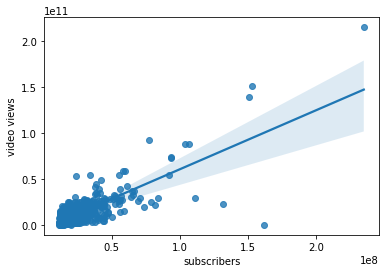

In [7]:
sns.regplot(data=table_df, x='subscribers', y='video views')

In [8]:
# Pearson correlation coefficient r
(r,p) = stats.pearsonr(table_df.subscribers, table_df['video views'])
print('r =', r, 'p =', p)

r = 0.7921847924535839 p = 2.149222422245282e-209


## Analysis 2:- How number of subscribers get varied along with category, country and primary language.

<AxesSubplot:xlabel='primary language', ylabel='subscribers'>

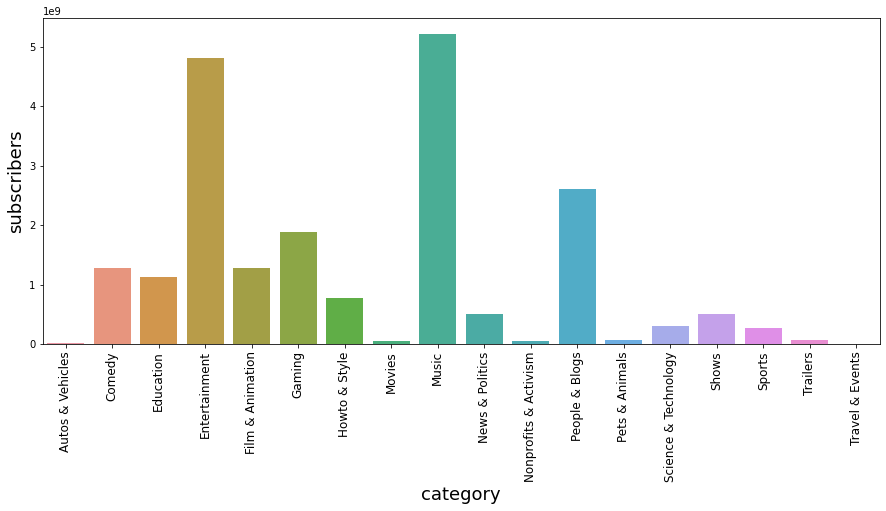

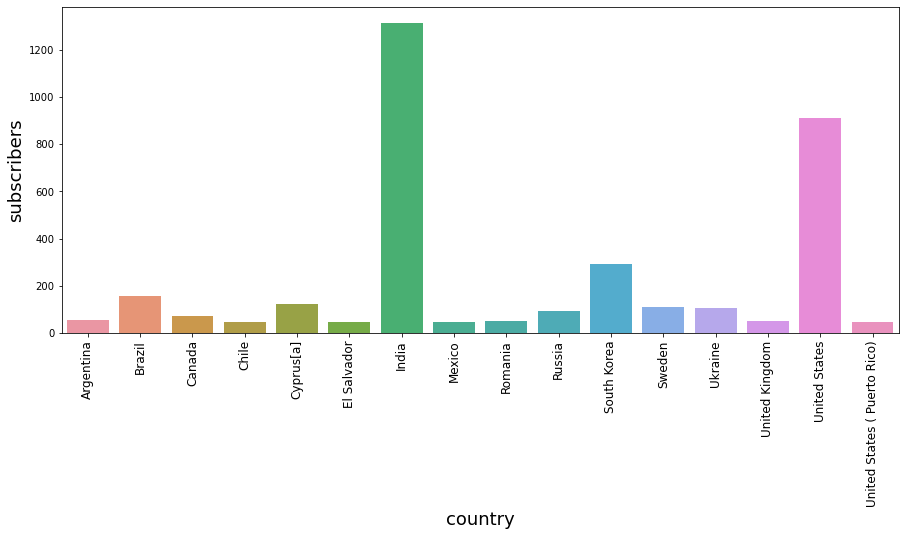

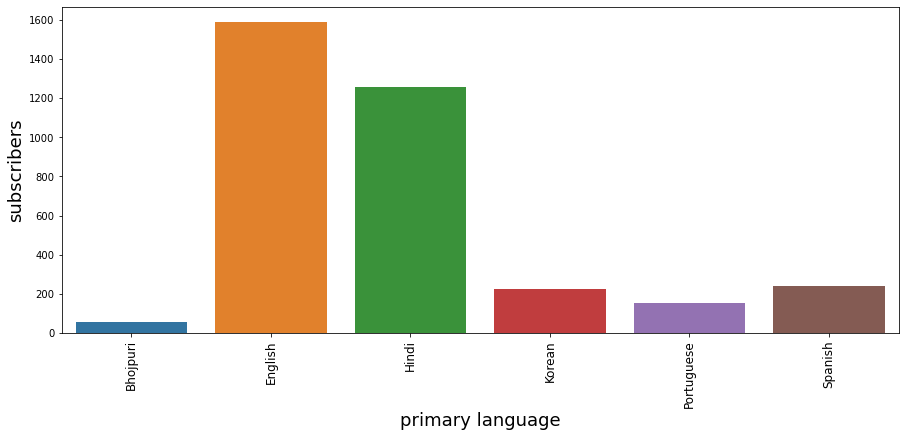

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('category', fontsize=18)
plt.ylabel('subscribers', fontsize=18)

categoryToSubscribers = table_df.groupby(['category']).agg({'subscribers':'sum'}).reset_index()
sns.barplot(data=categoryToSubscribers, x='category', y='subscribers')



fig, ax = plt.subplots(figsize=(15, 6))

plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('Country', fontsize=18)
plt.ylabel('subscribers', fontsize=18)

countryToSubscribers = df.groupby(['country']).agg({'subscribers':'sum'}).reset_index()
sns.barplot(data=countryToSubscribers, x='country', y='subscribers')



fig, ax = plt.subplots(figsize=(15, 6))

plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('Country', fontsize=18)
plt.ylabel('subscribers', fontsize=18)

countryToSubscribers = df.groupby(['primary language']).agg({'subscribers':'sum'}).reset_index()
sns.barplot(data=countryToSubscribers, x='primary language', y='subscribers')


In [10]:
# fig, ax = plt.subplots(figsize=(15, 6))

# plt.xticks(rotation='vertical', fontsize=12)
# plt.xlabel('category', fontsize=18)
# plt.ylabel('subscribers', fontsize=18)

# categoryToSubscribers = table_df.groupby(['category']).agg({'subscribers':'sum'}).reset_index()
# sns.barplot(data=categoryToSubscribers, x='category', y='subscribers')

# fig, ax = plt.subplots(figsize=(15, 6))

# plt.xticks(rotation='vertical', fontsize=12)
# plt.xlabel('category', fontsize=18)
# plt.ylabel('subscribers', fontsize=18)

# categoryToSubscribers = table_df.groupby(['category']).agg({'video views':'sum'}).reset_index()
# sns.barplot(data=categoryToSubscribers, x='category', y='video views')

In [11]:
# fig, ax = plt.subplots(figsize=(15, 6))

# plt.xticks(rotation='vertical', fontsize=12)
# plt.xlabel('Country', fontsize=18)
# plt.ylabel('subscribers', fontsize=18)

# countryToSubscribers = df.groupby(['country']).agg({'subscribers':'sum'}).reset_index()
# sns.barplot(data=countryToSubscribers, x='country', y='subscribers')

# fig, ax = plt.subplots(figsize=(15, 6))

# plt.xticks(rotation='vertical', fontsize=12)
# plt.xlabel('primary language', fontsize=18)
# plt.ylabel('video count', fontsize=18)

# df['rank'] = df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')
# table_df['rank'] = table_df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')

# mergedTable1 = pd.merge(df, table_df, on='rank')

# countryToSubscribers = mergedTable1.groupby(['country']).agg({'video views':'sum'}).reset_index()
# sns.barplot(data=countryToSubscribers, x='country', y='video views')

In [12]:
# fig, ax = plt.subplots(figsize=(15, 6))

# plt.xticks(rotation='vertical', fontsize=12)
# plt.xlabel('Country', fontsize=18)
# plt.ylabel('subscribers', fontsize=18)

# countryToSubscribers = df.groupby(['primary language']).agg({'subscribers':'sum'}).reset_index()
# sns.barplot(data=countryToSubscribers, x='primary language', y='subscribers')

# fig, ax = plt.subplots(figsize=(15, 6))

# plt.xticks(rotation='vertical', fontsize=12)
# plt.xlabel('primary language', fontsize=18)
# plt.ylabel('video count', fontsize=18)

# df['rank'] = df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')
# table_df['rank'] = table_df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')

# mergedTable = pd.merge(df, table_df, on='rank')

# mergedTable
# countryToSubscribers = mergedTable.groupby(['primary language']).agg({'video views':'sum'}).reset_index()
# sns.barplot(data=countryToSubscribers, x='primary language', y='video views')

## Analysis 3 :- Countries having more brand channels.

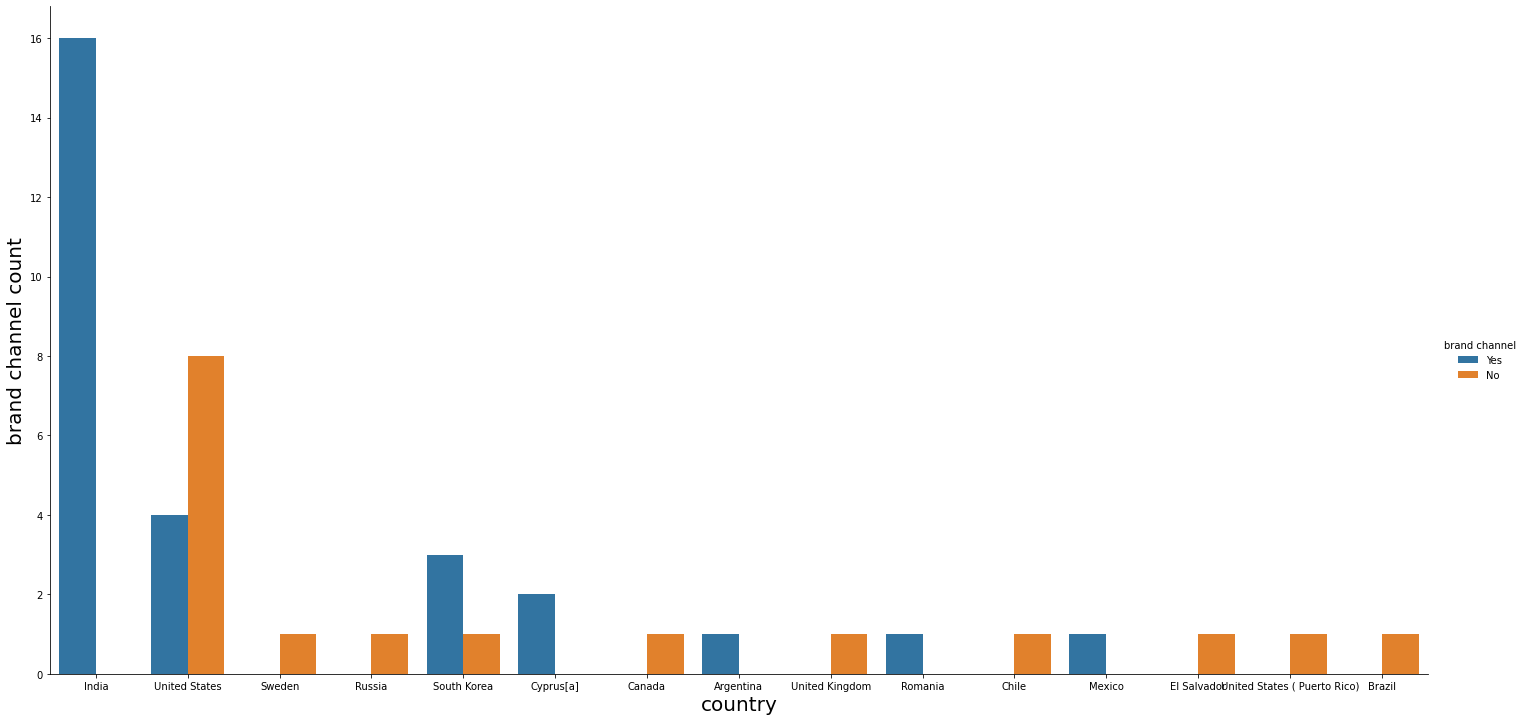

In [13]:
df['rank'] = df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')
table_df['rank'] = table_df['rank'].astype(str).str.replace('$', '',regex=True).astype('int64')

mergedTable = pd.merge(df.head(48), table_df, on='rank')

catplot_tick = sns.catplot(x='country', hue='brand channel', data=mergedTable, kind='count', height=10, aspect=2)
catplot_tick.set_xlabels('country', fontsize=20) # not set_label
catplot_tick.set_ylabels('brand channel count', fontsize=20)

## Analysis 4 :- How population of country correlates to subscribers in youtube channel.

<AxesSubplot:xlabel='country', ylabel='subscribers'>

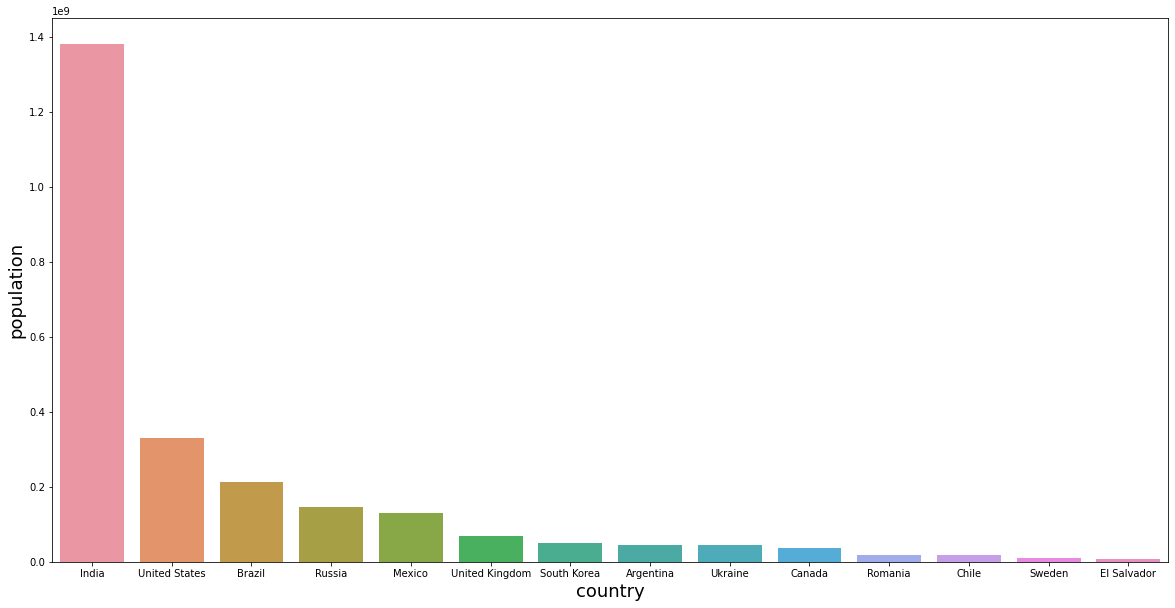

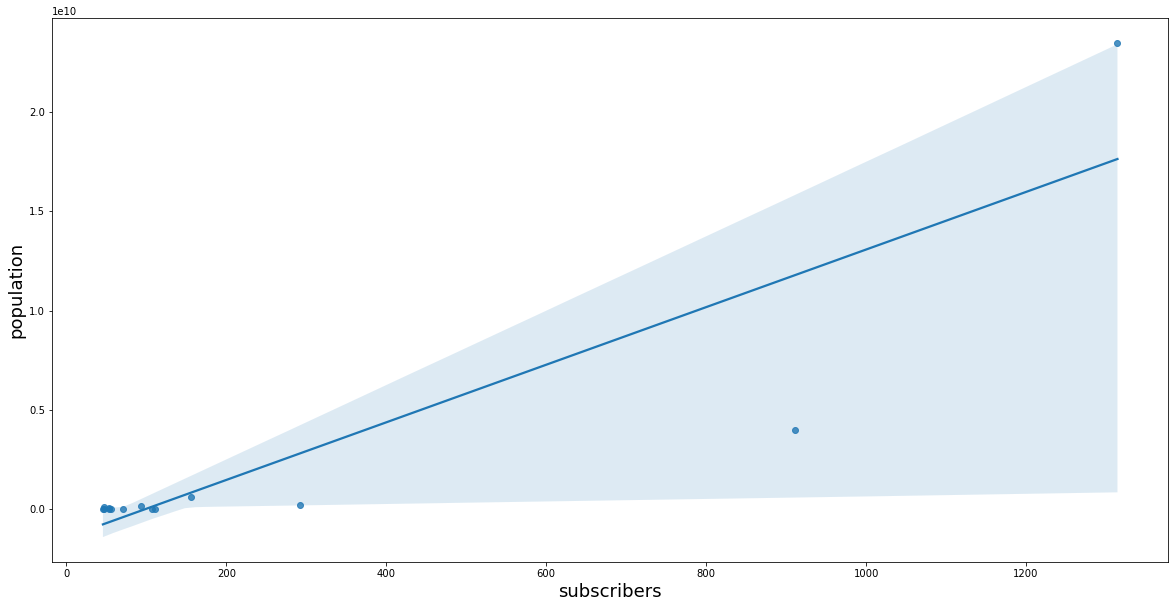

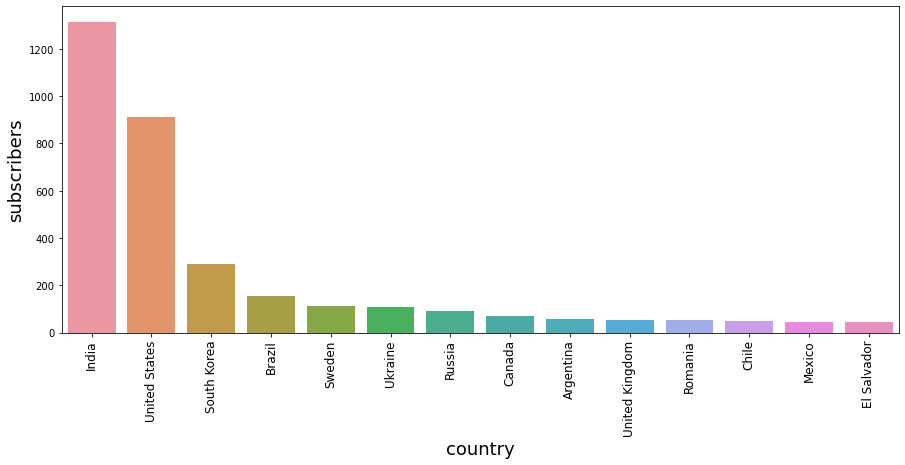

In [14]:
mergedTable1 = pd.merge(table_df1, df, on='country')

populationToSubscribers = mergedTable1.groupby(['country']).agg({'subscribers':'sum','population':'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(20, 10))

plt.xlabel('country', fontsize=18)
plt.ylabel('population', fontsize=18)

sns.barplot(data=mergedTable1, x='country', y='population')



fig, ax = plt.subplots(figsize=(20, 10))

plt.xlabel('subscribers', fontsize=18)
plt.ylabel('population', fontsize=18)

sns.regplot(x='subscribers', y='population', data=populationToSubscribers)



fig, ax = plt.subplots(figsize=(15, 6))

plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('country', fontsize=18)
plt.ylabel('subscribers', fontsize=18)


countryToSubscribers = mergedTable1.groupby(['country']).agg({'subscribers':'sum'}).reset_index()
sns.barplot(data=countryToSubscribers.sort_values(by='subscribers', ascending=False), x='country', y='subscribers')

In [15]:
# Pearson correlation coefficient r
(r,p) = stats.pearsonr(populationToSubscribers.subscribers, populationToSubscribers.population)
print('r =', r, 'p =', p)

r = 0.889950643918157 p = 2.0152618220041033e-05


## Analysis 5:- How subscribers count depends on how older the channel is and video views.

<AxesSubplot:xlabel='subscribers', ylabel='older'>

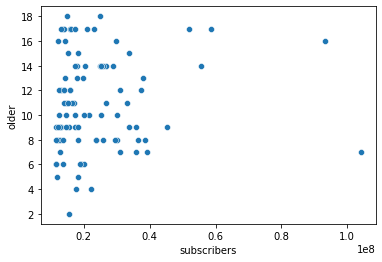

In [16]:
sns.scatterplot(data=table_df[table_df['older'] <= 20].sample(frac=0.1), x='subscribers', y='older')

<AxesSubplot:xlabel='subscribers', ylabel='video views'>

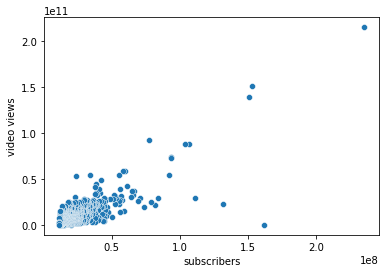

In [17]:
sns.scatterplot(x='subscribers', y='video views', data=table_df)